## Introduction to Deep Learning
## Assignment 1 
### Please fill the jupyter adding the code and description that are asked for each exercise. Please send your solution to maria.vakalopoulou@centralesupelec.fr by 8/3/2020. 
### Instructions: Rename the jupyter adding your name at the end of the title and as subject for the mail select DL-Assignement1-<YOUR NAME\>
### This exercise will be the 50% of your final grade! Good luck!! ;)

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps. CIFAR10 contains 6000 images for each of 10 different classes namely:  airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

2a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation

#**EXPLANATION:**

The first change made  is the division of train dataset into 45,000 images for training and 5,000 for validation. 

Hence, the model will not overfit and once it is tuned with relevant hyperparameters and regularizatiins, it will be run on the actial test data - 10,000 images. 

In [0]:
#batch size = 16. this is the 4th dimension. 

In [108]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np


# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])


indices = np.arange(50000)
np.random.shuffle(indices)


trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

train_dataloader = torch.utils.data.DataLoader(trainset, batch_size= 16,shuffle=False,sampler=torch.utils.data.SubsetRandomSampler(indices[:45000]))
#iterable - 

val_dataloader = torch.utils.data.DataLoader(trainset, batch_size= 16,shuffle=False,sampler=torch.utils.data.SubsetRandomSampler(indices[45000:50000]))
#iterable - 


testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

test_dataloader = torch.utils.data.DataLoader(testset, batch_size= 16, shuffle=False)
# *****END CODE

==> Preparing data..
Files already downloaded and verified
Files already downloaded and verified


In [109]:
print(train_dataloader)
print(test_dataloader)

1b) Create your convolutional neural network.
*   Create your own CNN architecture, defining the modules that you want to include
*   Be sure you are using convolutional modules, activation functions as well as fully connected modules
*   Use different modules and hyperparameters to boost the performance of the network

#**EXPLANATION**

The model was tuned multiple times over the complete dataset and tested on validation [45000,5000]

Initially a 2 CNN plus 2 FC model was used to build a baseline of 50%

The model was then gradually developed to the below. The idea is to build from scratch and not follow or copy state of the srt models as that obviously have better accraxy. 

However, the tuning and hyperparamters/regularizations have all been used to optmize the model. 


##**ARCHITECTURE CHOICE**

The state of the art models were not copied and this model was built from scvratch, as the point of this exercise was trial and error to understand the working of CNN, rather than get only high accuracy (although that is also obtained)

3 CNN, each including a Batch Normalization, Max Pool and ReLU activation work best for this problem. 

The number of channels were optimized after multiple trial and errors.

The image is then flattened, once the 3 CNNs have learnt from it and then passed through 3 fully connected layers, each with its own dropout and ReLU activation. 

Leaky ReLU is not use and ReLU is preferred keeping in mind the neuron activations. 

All values of channels such as 32, 64 have been decide after tuning and the choice was made to introduce one more CNN rather than increase the channels from 64 to 128 in the same layer.

Same principle followed for FC3.

The model was for some dats satuch at 66% accurcay but now it goes uo to 72% overall and even 90% for upoto 4 classes. 

This is alos applicable for Q2 for which different observations were obtained but rhe end architecture is matching. 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        #one input, 32 output channels 
        #32 input, 64 output channels
        self.conv1 = nn.Conv2d(3, 32, kernel_size = 3, padding = 1) # 32,32,32
        self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1) # 32 x 32 x 64
        self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        
        self.dropout1 = nn.Dropout2d(0.5)
        self.dropout2 = nn.Dropout2d(0.5)
        self.dropout3 = nn.Dropout2d(0.5)

        self.relu = nn.ReLU(inplace=True)
        
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        #self.maxpool = nn.MaxPool2d(2, 2)
        
        self.bn1 = nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.9)
        self.bn2 = nn.BatchNorm2d(num_features=64, eps=1e-05, momentum=0.9)

        #usually image is 32x32
        #after convolutional, we will make 2d into 1d, flatten it 
        #due to kernel size, max pooling etc, the image size will decrease. 
        #we need to undertsnd after each layer, after max pooling etc 
        self.fc1 = nn.Linear(2048, 1024) #removed 16384
        self.fc2 = nn.Linear(1024, 128)
        self.fc3 = nn.Linear(128, 10)

        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        #x = self.bn1
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.bn2(x)
        x = self.maxpool(x) #(x,2)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout3(x)


        output = x  #F.log_softmax(x, dim=1)
        return output
        
        


# *****END CODE

1c) Create the training scheme
*    Call the model
*    Specify the training hyperparameters like type of optimizer and criterion
*    Specify number of epochs

#**EXPLANATION:**

As this is a multi-class classication task, ConvNet() is used as the model for running CNN. 

Stochatsic Gradient Descent is used with a standard learning rate and in addition, weight decay has also been included. 

These values have been selected after multiple model runs as these yielded the highest results. 

Cross Entropy Loss is also the most suitabke in this case. 

Cuda has also been instantiated for comutational efficiency due to to which a high number of epochs were run. 

In [0]:
# define model, optimizer, criterion and number of training epochs

# *****START CODE

model = ConvNet()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,weight_decay=0.0001)
criterion = nn.CrossEntropyLoss()
epochs = 100

# *****END CODE

In [0]:
use_cuda = True
if use_cuda and torch.cuda.is_available():
  model.cuda()

In [113]:
torch.cuda.is_available()

True

1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behavor of the model?

# **EXPLANATION:**

This complete function performs both the training and the validation for a high number of epochs.
Initially 10 epochs were tested and the loss kept decreasing. 

They were raised to 20 and later 30. Earleir runs showed optimal accuracy at 21 but later runs with additional layers yielded highest accuracy around **95-100th epoch**. 

Hence this number is used **(100 EPOCHS)**. The function prints the loss at each mini batch of 200, for each of the 100 epochs. Thius is done so that a gradual and intuitive undertstanding of the model is built.


In [115]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE

loss_train = []
loss_eval = []
#training_loss = []
#eval_loss = []

for epoch in range(epochs):
  training_loss = 0.0
  total = 0
  model.train()

  for i, data in enumerate(train_dataloader, 0):
    # Get the inputs
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
        
    # Zero the parameter gradients
    optimizer.zero_grad()
        
    # Forward + backward + optimize
    outputs = model(inputs)
        
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    total += labels.size(0)

    #Print results and stats 
    training_loss +=loss.item()
    
    if i % 200 == 199: #every 200 mini batches as defined
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, training_loss / 200))
  
  loss_train.append(training_loss/len(trainset))
  
  eval_loss = 0.0
  total = 0
  correct = 0
  predictions = []
  model.eval()

  for i, data in enumerate(val_dataloader, 0):
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    eval_loss += loss.item()
    total += labels.size(0)
    
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    correct += (predicted == labels).sum().item()


  loss_eval.append(eval_loss/len(testset))
  print(total)

   

print('Finished Training')




# *****END CODE

[1,   200] loss: 1.672
[1,   400] loss: 3.319
[1,   600] loss: 4.979
[1,   800] loss: 6.635
[1,  1000] loss: 8.297
[1,  1200] loss: 9.967
[1,  1400] loss: 11.612
[1,  1600] loss: 13.263
[1,  1800] loss: 14.858
[1,  2000] loss: 16.504
[1,  2200] loss: 18.174
[1,  2400] loss: 19.822
[1,  2600] loss: 21.453
[1,  2800] loss: 23.107
5000
[2,   200] loss: 1.648
[2,   400] loss: 3.278
[2,   600] loss: 4.955
[2,   800] loss: 6.624
[2,  1000] loss: 8.273
[2,  1200] loss: 9.902
[2,  1400] loss: 11.536
[2,  1600] loss: 13.192
[2,  1800] loss: 14.791
[2,  2000] loss: 16.429
[2,  2200] loss: 18.062
[2,  2400] loss: 19.687
[2,  2600] loss: 21.322
[2,  2800] loss: 22.971
5000
[3,   200] loss: 1.618
[3,   400] loss: 3.296
[3,   600] loss: 4.909
[3,   800] loss: 6.512
[3,  1000] loss: 8.157
[3,  1200] loss: 9.780
[3,  1400] loss: 11.439
[3,  1600] loss: 13.070
[3,  1800] loss: 14.670
[3,  2000] loss: 16.314
[3,  2200] loss: 17.924
[3,  2400] loss: 19.590
[3,  2600] loss: 21.229
[3,  2800] loss: 22.869


# **EXPLANATION:**

Here we see how the loss decreases to become flat at the highest epoch.

Hence, later for the actual test data, 30 epochs are used as the optimum

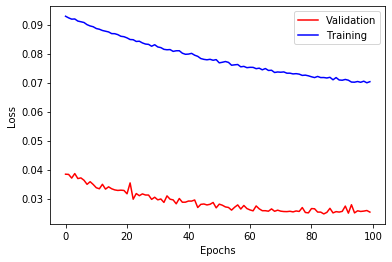

In [117]:
import matplotlib. pyplot as plt

plt.plot(loss_eval, 'r', loss_train, 'b')
plt.legend(['Validation', 'Training'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [118]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
model_save_name = 'cnn_cifar.pt'
path = F"/content/gdrive/My Drive/Pytorch/Assignment 1/{model_save_name}" 
torch.save(model.state_dict(), path)

# **EXPLANATION:**

Here, we see how this model yields upto **92%** accuracy for certain image classes. 

Multiple runs on validation and later test data showed that these high performing classes kept getting high results of **more than 85%**

Therefore the takeaway is that although multiple runs of this CNN has generated results **up to 78% overall accuracy**, it is **highly accurate for 4 image classes throughout**

In [123]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck')

class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in test_dataloader:
        images, labels = data

        if use_cuda and torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        class_total[i], 100 * class_correct[i] / class_total[i]))

Accuracy of 227.0 : 77 %
Accuracy of 247.0 : 92 %
Accuracy of 278.0 : 67 %
Accuracy of 245.0 : 64 %
Accuracy of 270.0 : 63 %
Accuracy of 240.0 : 77 %
Accuracy of 228.0 : 89 %
Accuracy of 258.0 : 73 %
Accuracy of 247.0 : 85 %
Accuracy of 260.0 : 87 %


##**Accuracy of 78% with up to 92% for a certain category of images (4 above 85%)**

In [121]:
#Evaluating on test data 

correct, total = 0, 0
predictions = []
model.eval()

for i, data in enumerate(test_dataloader, 0):
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
      
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
    
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))



The testing set accuracy of the network is: 78 %


In [37]:
'''
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_dataloader, 0):
        running_loss =+ loss.item() * images.size(0)

    loss_values.append(running_loss / len(train_dataset))

plt.plot(loss_values)
'''

'\nfor epoch in range(num_epochs):\n    running_loss = 0.0\n    for i, data in enumerate(train_dataloader, 0):\n        running_loss =+ loss.item() * images.size(0)\n\n    loss_values.append(running_loss / len(train_dataset))\n\nplt.plot(loss_values)\n'

1e) Pick an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

# **EXPLANATION:**

Objective is to find an input image which maximises the activation

This Sequential function shows how a function learns on a random image (noise) 
We maximise the activation by fixing other parameters of the function. Hence the feature maps below show how the model learns the features of the image upon each epoch. '

A high number of epochs is taken to visualize the learning of the model.

Filter 0. Epoch 30. Loss = -1.2541
Filter 1. Epoch 30. Loss = 0.4401
Filter 2. Epoch 30. Loss = -38.3324
Filter 3. Epoch 30. Loss = -4.0745
Filter 4. Epoch 30. Loss = -4.0605
Filter 5. Epoch 30. Loss = -0.9702
Filter 6. Epoch 30. Loss = -0.3969
Filter 7. Epoch 30. Loss = -1.5540
Filter 8. Epoch 30. Loss = 0.1026
Filter 9. Epoch 30. Loss = -9.3471
Filter 10. Epoch 30. Loss = -2.9225
Filter 11. Epoch 30. Loss = 0.0596
Filter 12. Epoch 30. Loss = -4.9099
Filter 13. Epoch 30. Loss = -0.3584
Filter 14. Epoch 30. Loss = 0.0189
Filter 15. Epoch 30. Loss = -4.7548
Filter 16. Epoch 30. Loss = 0.4275
Filter 17. Epoch 30. Loss = -6.9119
Filter 18. Epoch 30. Loss = -4.1116
Filter 19. Epoch 30. Loss = 0.3884
Filter 20. Epoch 30. Loss = -6.2543
Filter 21. Epoch 30. Loss = -0.2550
Filter 22. Epoch 30. Loss = -6.8639
Filter 23. Epoch 30. Loss = -0.0025
Filter 24. Epoch 30. Loss = -2.7912
Filter 25. Epoch 30. Loss = -6.6128
Filter 26. Epoch 30. Loss = 0.3098
Filter 27. Epoch 30. Loss = -2.2488
Filter 2

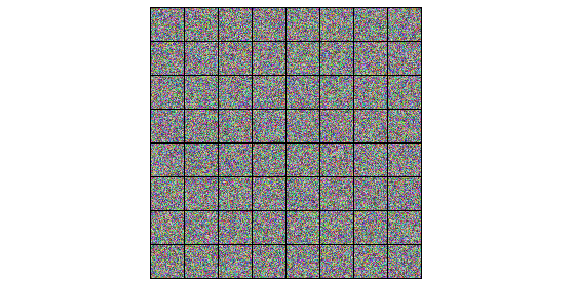

In [202]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 64  # e.g 64
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
model.load_state_dict(torch.load('/content/gdrive/My Drive/Pytorch/Assignment 1/cnn_cifar.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(model.conv1, 
                        nn.ReLU(), 
                        model.maxpool,
                        model.conv2, 
                        nn.ReLU(), 
                        model.bn2, 
                        model.maxpool)
# *****END CODE

## Put submodel in eval mode.
submodel.eval()

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 30  #e.g 30
# *****END CODE

## Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    img.requires_grad_()


    # *****END CODE

    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.SGD([img], lr=0.001, momentum= 0.9)
   
    
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE

        # Forward + backward + optimize
        
        outputs = submodel(img)
        
        loss = -torch.mean(outputs[:,c,:,:])

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        
        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

### Question 2 - CNNs FOR GEOMETRICAL SHAPES

The goal of this exercise is to train a CNN that will take as input one image depicting a triangle and predict the corresponding (x,y) coordicantes of the triangle's vertices. Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. 
*  Read and understand the following code

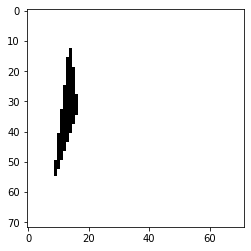

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split


# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the training dataset. Generate 2000 triangles for the training. Use part of the training dataset (400 triangles) to validate your netork.

#**EXPLANATION**

Below we create two train sets for each of the coordinates. 

They are then solit into training and validation as test data will only be used once the model is optimized. 

We observe that the data is not in the desired share hence we transform it to 4d so that it is [1600,1,72,72] and label data is [1600,6]

This will then sllow us to transform the arrays into Tensors, create a DataFrame and merge the two.

Then wach of them will be loaded into their DataLoaders.

The same is done later for the 300 test images. 

In [131]:
##generate training dataset
# *****START CODE
#indices2 = np.arange(2000)
#np.random.shuffle(indices2)

x_trainset_2, y_trainset_2 = generate_dataset_regression(2000)



# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990


In [0]:
##use part of the training dataset for validation
# *****START CODE

x_trainset2, x_valset2, y_trainset2, y_valset2 = train_test_split(x_trainset_2, y_trainset_2, train_size=0.8,test_size=0.2)


# *****END CODE

In [133]:
print(x_trainset2.shape)
print(x_valset2.shape)
print(y_trainset2.shape)
print(y_valset2.shape)

(1600, 5184)
(400, 5184)
(1600, 6)
(400, 6)


In [134]:
x_trainset2 = np.reshape(x_trainset2, (1600, 1, IMAGE_SIZE, IMAGE_SIZE))
print(x_trainset2.shape)

x_valset2 = np.reshape(x_valset2, (400, 1, IMAGE_SIZE, IMAGE_SIZE))
print(x_valset2.shape)

print(y_trainset2.shape)

print(y_valset2.shape)

(1600, 1, 72, 72)
(400, 1, 72, 72)
(1600, 6)
(400, 6)


In [186]:
x_trainset2 = torch.Tensor(x_trainset2)
print(x_trainset2)

x_valset2 = torch.Tensor(x_valset2)
print(x_valset2)

y_trainset2 = torch.Tensor(y_trainset2)
print(y_trainset2)

y_valset2 = torch.Tensor(y_valset2)
print(y_valset2)




tensor([[[[1.0014, 1.0012, 1.0018,  ..., 1.0026, 1.0010, 1.0032],
          [1.0019, 1.0010, 1.0003,  ..., 1.0016, 1.0037, 1.0031],
          [1.0033, 1.0033, 1.0020,  ..., 1.0026, 1.0009, 1.0008],
          ...,
          [1.0034, 1.0006, 1.0037,  ..., 1.0018, 1.0039, 1.0022],
          [1.0017, 1.0034, 1.0033,  ..., 1.0015, 1.0038, 1.0031],
          [1.0037, 1.0026, 1.0022,  ..., 1.0007, 1.0001, 1.0023]]],


        [[[1.0015, 1.0026, 1.0022,  ..., 1.0019, 1.0007, 1.0030],
          [1.0016, 1.0019, 1.0008,  ..., 1.0017, 1.0038, 1.0002],
          [1.0014, 1.0002, 1.0004,  ..., 1.0035, 1.0005, 1.0000],
          ...,
          [1.0034, 1.0002, 1.0037,  ..., 1.0030, 1.0006, 1.0028],
          [1.0006, 1.0033, 1.0001,  ..., 1.0035, 1.0038, 1.0023],
          [1.0017, 1.0021, 1.0006,  ..., 1.0013, 1.0036, 1.0025]]],


        [[[1.0024, 1.0026, 1.0008,  ..., 1.0036, 1.0036, 1.0037],
          [1.0028, 1.0035, 1.0037,  ..., 1.0033, 1.0028, 1.0005],
          [1.0018, 1.0032, 1.0029,  ..

In [187]:
import torch.utils.data as data

trainset2 = data.TensorDataset(x_trainset2,y_trainset2)
print(trainset2)

valset2 = data.TensorDataset(x_valset2, y_valset2)
print(valset2)



In [0]:
train_dataloader2 = torch.utils.data.DataLoader(trainset2, batch_size= 16,shuffle=True)

val_dataloader2 = torch.utils.data.DataLoader(valset2, batch_size= 16,shuffle=True)


2b) Use function 'generate_test_set' to create the testing dataset. The function will generate automatically 300 triangles!

In [137]:
##generate test dataset
# *****START CODE

x_testset_2, y_testset_2 = generate_test_set_regression()


# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [89]:
print(x_testset_2.shape)
print(y_testset_2.shape)

(300, 5184)
(300, 6)


In [138]:
x_testset_2 = np.reshape(x_testset_2, (300, 1, IMAGE_SIZE, IMAGE_SIZE))
print(x_testset_2.shape)

print(y_testset_2.shape)

(300, 1, 72, 72)
(300, 6)


In [188]:
x_testset2 = torch.Tensor(x_testset_2)
print(x_testset2)

y_testset2 = torch.Tensor(y_testset_2)
print(y_testset2)

tensor([[[[1.0029, 1.0003, 1.0015,  ..., 1.0020, 1.0011, 1.0018],
          [1.0034, 1.0012, 1.0008,  ..., 1.0022, 1.0036, 1.0000],
          [1.0032, 1.0037, 1.0004,  ..., 1.0021, 1.0027, 1.0011],
          ...,
          [1.0036, 1.0005, 1.0016,  ..., 1.0019, 1.0031, 1.0023],
          [1.0030, 1.0013, 1.0033,  ..., 1.0028, 1.0036, 1.0009],
          [1.0036, 1.0012, 1.0038,  ..., 1.0020, 1.0032, 1.0030]]],


        [[[1.0005, 1.0038, 1.0034,  ..., 1.0018, 1.0010, 1.0015],
          [1.0001, 1.0021, 1.0020,  ..., 1.0003, 1.0035, 1.0001],
          [1.0029, 1.0030, 1.0037,  ..., 1.0019, 1.0008, 1.0008],
          ...,
          [1.0015, 1.0030, 1.0023,  ..., 1.0028, 1.0037, 1.0022],
          [1.0024, 1.0003, 1.0034,  ..., 1.0032, 1.0016, 1.0001],
          [1.0002, 1.0034, 1.0038,  ..., 1.0013, 1.0006, 1.0018]]],


        [[[1.0018, 1.0026, 1.0031,  ..., 1.0037, 1.0032, 1.0032],
          [1.0008, 1.0006, 1.0001,  ..., 1.0030, 1.0014, 1.0029],
          [1.0016, 1.0003, 1.0030,  ..

In [189]:
import torch.utils.data as data

testset2 = data.TensorDataset(x_testset2,y_testset2)
print(testset2)

In [0]:
test_dataloader2 = torch.utils.data.DataLoader(testset2, batch_size= 16,shuffle=True)

2c) Create your convolutional neural network.
* Similarly to the previous exercise construct your network and choose your modules
* Optimize the architecture to perform well on predicting the different coordinates

#**EXPLANATION:**

This question has major differences from Q1.

It is a regression problem hence the model will be ConvNetR(). We need to regress for 6 points for each triangle rather than classify images into 10 classes.

###**ARCHITECTURE CHOICE**

The state of the art models were not copied and this model was built from scvratch, as the point of this exercise was triala nd error to understand the working of CNN, rather than get only high accuracy (although that is also obtained)

3 CNN, each including a Batch Normalization, Max Pool and ReLU activation work best for this problem. 

The number of channels were optimized after multiple trial and errors.

The image is then flattened, once the 3 CNNs have learnt from it and then passed through 3 fully connected layers, each with its own dropout and ReLU activation. 

Leaky ReLU is not use and ReLU is preferred keeping in mind the neuron activations. 

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
      super(ConvNetR, self).__init__()

      self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, padding = 1) # 32,32,32
      self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1) # 32 x 32 x 64
      self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        
      self.dropout1 = nn.Dropout2d(0.5)
      self.dropout2 = nn.Dropout2d(0.5)
      self.dropout3 = nn.Dropout2d(0.5)

      self.relu = nn.ReLU(inplace=True)
        
      self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
      #self.maxpool = nn.MaxPool2d(2, 2)
        
      self.bn1 = nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.9)
      self.bn2 = nn.BatchNorm2d(num_features=64, eps=1e-05, momentum=0.9)

        #usually image is 32x32
        #after convolutional, we will make 2d into 1d, flatten it 
        #due to kernel size, max pooling etc, the image size will decrease. 
        #we need to undertsnd after each layer, after max pooling etc 
      self.fc1 = nn.Linear(10368, 1024) #removed 16384
      self.fc2 = nn.Linear(1024, 128)
      self.fc3 = nn.Linear(128, 6)

        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        #x = self.bn1
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.bn2(x)
        x = self.maxpool(x) #(x,2)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout3(x)


        output = x  #F.log_softmax(x, dim=1)
        return output





    
# *****END CODE

2d) Define model, optimizer, criterion and number of epochs.

In [0]:
# *****START CODE

model = ConvNetR()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,weight_decay=0.0001)
criterion = nn.MSELoss(reduction='mean') #MAP not used
epochs = 150

# *****END CODE

In [0]:
use_cuda = True
if use_cuda and torch.cuda.is_available():
  model.cuda()

In [97]:
torch.cuda.is_available()

True

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?

#**EXPLANATION**

Similar tot he last question, a Stochastic Gradient Descent is the optimal choice rather than Adam. 

The MSELoss with reduction = mean is used.
This is because in a Euclidean space the squared loss computed for the distance of the coordinate points will represent the loss really well. 

**150 epochs** are used as they yield the optimal performance for this CNN architecture. We will then choose the optimal epoch for test data


2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [98]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE

loss_train = []
loss_eval = []
#training_loss = []
#eval_loss = []

for epoch in range(150):
  training_loss = 0.0
  total = 0
  model.train()

  for i, data in enumerate(train_dataloader2, 0):
    # Get the inputs
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
        
    # Zero the parameter gradients
    optimizer.zero_grad()
        
    # Forward + backward + optimize
    outputs = model(inputs)
        
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    total += labels.size(0)

    #Print results and stats 
    training_loss +=loss.item()
    
    if i % 200 == 199: #every 200 mini batches as defined
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, training_loss / 200))
  
  loss_train.append(training_loss/len(trainset2))
  
  eval_loss = 0.0
  total = 0
  correct = 0
  predictions = []
  model.eval()

  for i, data in enumerate(val_dataloader2, 0):
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    eval_loss += loss.item()
    total += labels.size(0)
    
    '''
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    correct += (predicted == labels).sum().item()
    '''

  loss_eval.append(eval_loss/len(testset2))
  print(total,loss_eval)


   

print('Finished Training')




# *****END CODE

400 [0.014521891723076502]
400 [0.014521891723076502, 0.012975722402334213]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646, 0.013427696327368418]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646, 0.013427696327368418, 0.012986220816771189]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646, 0.013427696327368418, 0.012986220816771189, 0.013047369966904322]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646, 0.013427696327368418, 0.012986220816771189, 0.013047369966904322, 0.012468081812063853]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646, 0.013427696327368418, 0.012986220816771189, 0.013047369966904322, 0.012468081812063853, 0.012618102431297303]
400 [0.014521891723076502, 0.012975722402334213, 0.013781450937191646, 0.013427696327368418, 0.012986220816771189, 0.013047369966904322, 0.012468081812063853, 0.0126181

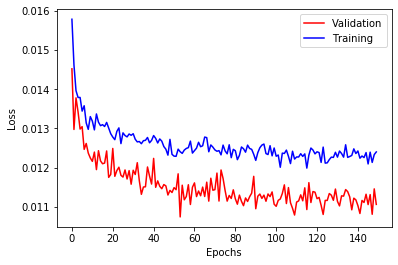

In [99]:
import matplotlib. pyplot as plt

plt.plot(loss_eval, 'r', loss_train, 'b')
plt.legend(['Validation', 'Training'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

##**EXPLANATION:**

Loss curves plotted above and below the same learning is used to finally test the model on test data (300 images)

We now know from the plot and results that the **111th EPOCH** yields the lowest loss and ghence that will be used for the actual test data. 

The 58th EPOCH also has low loss but as the plot shows a decreasing trend i . thr loss, hence 11th is oreffered over 58th. 

In [101]:
test_loss = 0.0
total = 0
model.eval()
loss_test = []
  
for epoch in range(111):
  for i, data in enumerate(test_dataloader2, 0):
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    test_loss += loss.item()
    total += labels.size(0)
    

  loss_test.append(test_loss/len(testset2))
  print(total,loss_test)


   

print('Finished Testing')



300 [0.008512867117921511]
600 [0.008512867117921511, 0.01701646775007248]
900 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707]
1200 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707, 0.0340451734016339]
1500 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707, 0.0340451734016339, 0.042577509880065915]
1800 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707, 0.0340451734016339, 0.042577509880065915, 0.05108811470369498]
2100 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707, 0.0340451734016339, 0.042577509880065915, 0.05108811470369498, 0.05961540641884009]
2400 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707, 0.0340451734016339, 0.042577509880065915, 0.05108811470369498, 0.05961540641884009, 0.06815008774399757]
2700 [0.008512867117921511, 0.01701646775007248, 0.02554229512810707, 0.0340451734016339, 0.042577509880065915, 0.05108811470369498, 0.05961540641884009, 0.06815008774399757, 0.076685969854394

In [0]:
'''
plt.plot(loss_test, 'r')#, loss_train, 'b', loss_eval,'g')
plt.legend(['Test', 'Training','Validation'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
'''

In [0]:
model_save_name = 'model_epoch{}.pk1'
path = F"/content/gdrive/My Drive/Pytorch/Assignment 1/{model_epoch{}.pk1}" 
torch.save(model.state_dict(), path)

In [0]:
pred_model = torch.load("/content/gdrive/My Drive/Pytorch/Assignment 1/{model_epoch{}.pk1}".format(111))
y_pred = pred_model((torch.tensor(x_testset2.reshape((300,1,72,72))).float()).cuda())

In [0]:
best_epoch = 111
y_pred_np = torch.Tensor.cpu(y_pred).detach().numpy()

#**EXPLANATION**:

The below visualizations show the accuracy of the models and eaxh of the 6 coordinates

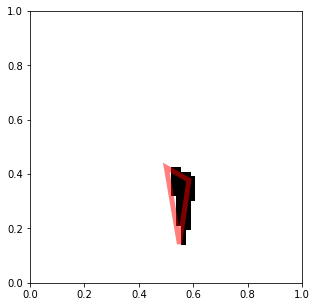

In [102]:
visualize_prediction(x_testset_2[230],y_pred_np[230])

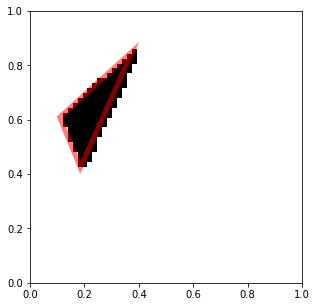

In [103]:
visualize_prediction(x_testset_2[23],y_pred_np[23])

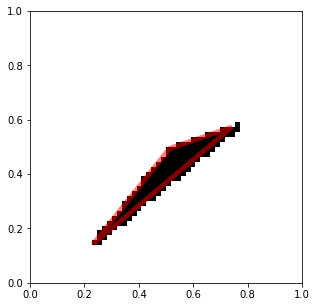

In [104]:
visualize_prediction(x_testset_2[111],y_pred_np[111])

###### Without y_pred

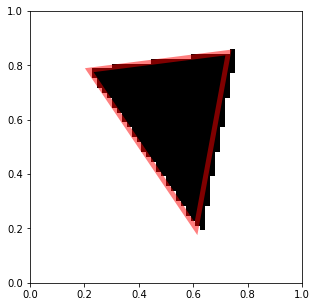

In [105]:
visualize_prediction(x_testset_2[144],y_testset_2[144])

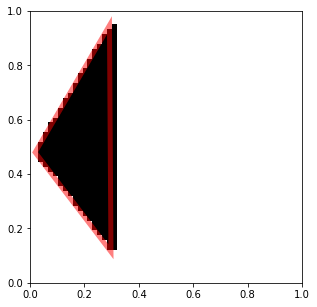

In [106]:
visualize_prediction(x_testset_2[298],y_testset_2[298])

2g) Think and implement a preprocessing step that can boost the accuracy of your network. Report the performance of your network after the implementation of the normalization pre-processing. Write a small description analysing this difference on the performance of the network.

#**EXPLANATION**

Normalization yield better results. It gives the better result at 150 epochs rather than the previous at 111th. Hence learning is faster and also more smoother than the previous plot.

The below steps ensure that the model is computationally efficient and yields a lower loss compared to standard CCNN network without this preprocessing and normalization. 

**Image normlization is also used for optimizing results. Mean of ~0.5 and std of ~0.2 is used.**

In addition, below steps are used. 

**L2 regularization through weight decay,**

**Drop out of 50% after each fully connected layer,**

**Batch Normalization for CNN layers,** (limit covariate shift by normalizing the activations of each layer, learn faster an don a more stable input)

**Early stopping due to epoch optimization,**



In [0]:
x_trainset2 = (x_trainset2 -0.5)/0.2
y_trainset2 = (y_trainset2 -0.5)/0.2

x_valset2 = (x_valset2 -0.5)/0.2
y_valset2 = (y_valset2 -0.5)/0.2

x_testset2 = (x_testset2 -0.5)/0.2
y_testset2 = (y_testset2 -0.5)/0.2

In [193]:
import torch.utils.data as data

trainset2 = data.TensorDataset(x_trainset2,y_trainset2)
print(trainset2)

valset2 = data.TensorDataset(x_valset2,y_valset2)
print(valset2)

testset2 = data.TensorDataset(x_testset2,y_testset2)
print(testset2)


In [0]:
from torch.utils.data import Dataset, DataLoader

transform = transforms.Compose(
              [transforms.ToTensor(),
               transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])


train_dataloader2 = torch.utils.data.DataLoader(trainset2, batch_size= 16,shuffle=True)
val_dataloader2 = torch.utils.data.DataLoader(valset2, batch_size= 16,shuffle=True)
test_dataloader2 = torch.utils.data.DataLoader(testset2, batch_size= 16,shuffle=True)


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
      super(ConvNetR, self).__init__()

      self.conv1 = nn.Conv2d(1, 32, kernel_size = 3, padding = 1) # 32,32,32
      self.conv2 = nn.Conv2d(32, 64, kernel_size = 3, padding = 1) # 32 x 32 x 64
      self.conv3 = nn.Conv2d(64, 128, kernel_size = 3, padding = 1)
        
      self.dropout1 = nn.Dropout2d(0.5)
      self.dropout2 = nn.Dropout2d(0.5)
      self.dropout3 = nn.Dropout2d(0.5)

      self.relu = nn.ReLU(inplace=True)
        
      self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
      #self.maxpool = nn.MaxPool2d(2, 2)
        
      self.bn1 = nn.BatchNorm2d(num_features=32, eps=1e-05, momentum=0.9)
      self.bn2 = nn.BatchNorm2d(num_features=64, eps=1e-05, momentum=0.9)

        #usually image is 32x32
        #after convolutional, we will make 2d into 1d, flatten it 
        #due to kernel size, max pooling etc, the image size will decrease. 
        #we need to undertsnd after each layer, after max pooling etc 
      self.fc1 = nn.Linear(10368, 1024) #removed 16384
      self.fc2 = nn.Linear(1024, 128)
      self.fc3 = nn.Linear(128, 6)

        
        
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        #x = self.bn1
        x = self.maxpool(x)

        x = self.conv2(x)
        x = self.relu(x)
        x = self.bn2(x)
        x = self.maxpool(x) #(x,2)

        x = self.conv3(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = torch.flatten(x, 1)

        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout1(x)

        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout2(x)

        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout3(x)


        output = x  #F.log_softmax(x, dim=1)
        return output
    
# *****END CODE

In [197]:
# *****START CODE

model = ConvNetR()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001,weight_decay=0.0001)
criterion = nn.MSELoss(reduction='mean') #MAP not used
epochs = 150

use_cuda = True
if use_cuda and torch.cuda.is_available():
  model.cuda()
  
torch.cuda.is_available()



# *****END CODE

True

In [198]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.

# *****START CODE

loss_train = []
loss_eval = []
#training_loss = []
#eval_loss = []

for epoch in range(150):
  training_loss = 0.0
  total = 0
  model.train()

  for i, data in enumerate(train_dataloader2, 0):
    # Get the inputs
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()
        
    # Zero the parameter gradients
    optimizer.zero_grad()
        
    # Forward + backward + optimize
    outputs = model(inputs)
        
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    total += labels.size(0)

    #Print results and stats 
    training_loss +=loss.item()
    
    if i % 200 == 199: #every 200 mini batches as defined
      print('[%d, %5d] loss: %.3f' % (epoch + 1, i + 1, training_loss / 200))
  
  loss_train.append(training_loss/len(trainset2))
  
  eval_loss = 0.0
  total = 0
  correct = 0
  predictions = []
  model.eval()

  for i, data in enumerate(val_dataloader2, 0):
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    eval_loss += loss.item()
    total += labels.size(0)
    
    '''
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    correct += (predicted == labels).sum().item()
    '''

  loss_eval.append(eval_loss/len(testset2))
  print(total,loss_eval)


   

print('Finished Training')




# *****END CODE

400 [0.16656312545140584]
400 [0.16656312545140584, 0.16270684202512106]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383, 0.1580605943997701]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383, 0.1580605943997701, 0.15722124616305033]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383, 0.1580605943997701, 0.15722124616305033, 0.15650258660316468]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383, 0.1580605943997701, 0.15722124616305033, 0.15650258660316468, 0.15619213581085206]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383, 0.1580605943997701, 0.15722124616305033, 0.15650258660316468, 0.15619213581085206, 0.1563497237364451]
400 [0.16656312545140584, 0.16270684202512106, 0.16001947244008383, 0.1580605943997701, 0.15722124616305033, 0.15650258660316468, 0.15619213581085206, 0.1563497237364451, 0.15565751393636068]
400 [0.16656312545

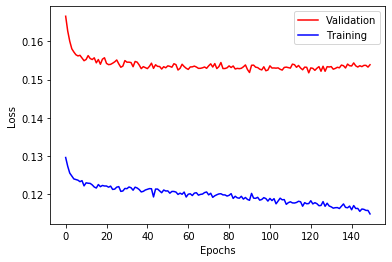

In [199]:
import matplotlib. pyplot as plt

plt.plot(loss_eval, 'r', loss_train, 'b')
plt.legend(['Validation', 'Training'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [200]:
test_loss = 0.0
total = 0
model.eval()
loss_test = []
  
for epoch in range(150):
  for i, data in enumerate(test_dataloader2, 0):
    inputs, labels = data

    if use_cuda and torch.cuda.is_available():
      inputs = inputs.cuda()
      labels = labels.cuda()

    outputs = model(inputs)
    loss = criterion(outputs,labels)
    test_loss += loss.item()
    total += labels.size(0)
    

  loss_test.append(test_loss/len(testset2))
  print(total,loss_test)


   

print('Finished Testing')



300 [0.12508652170499165]
600 [0.12508652170499165, 0.25005605618158977]
900 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744]
1200 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744, 0.5002158784866333]
1500 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744, 0.5002158784866333, 0.6254011007150014]
1800 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744, 0.5002158784866333, 0.6254011007150014, 0.7503428339958191]
2100 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744, 0.5002158784866333, 0.6254011007150014, 0.7503428339958191, 0.8750549272696178]
2400 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744, 0.5002158784866333, 0.6254011007150014, 0.7503428339958191, 0.8750549272696178, 0.9999111982186636]
2700 [0.12508652170499165, 0.25005605618158977, 0.3750271701812744, 0.5002158784866333, 0.6254011007150014, 0.7503428339958191, 0.8750549272696178, 0.9999111982186636, 1.1249034551779429]
3000 [0.12508652170499165, 0.250